# SPARK FOUNDATION INTERNSHIP -PROJECT 1
# **Prediction using Supervised ML**
# by Moses Kiboma
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression and random forest involving two variables.



In [10]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

# Downloading data 

In [11]:
# Reading data from remote link
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print("Data imported successfully")

df.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# PERFORMING EDA

# Checking missing values

In [12]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

# Describing the  scores and hours

In [13]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Visualizing the data

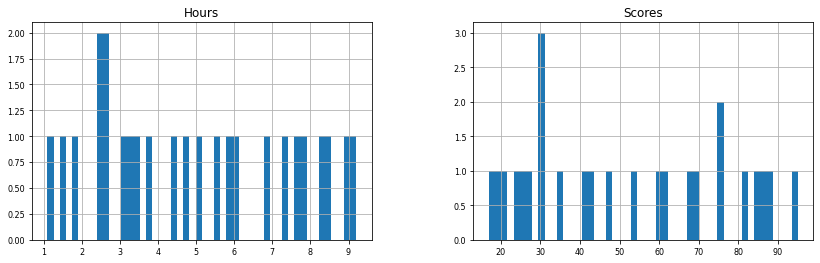

In [14]:
df.hist(figsize=(14, 4), bins=50, xlabelsize=8, ylabelsize=8); 

This is how the variables are related to their frequency

# How hours spent in reading are Related to Scores or performance

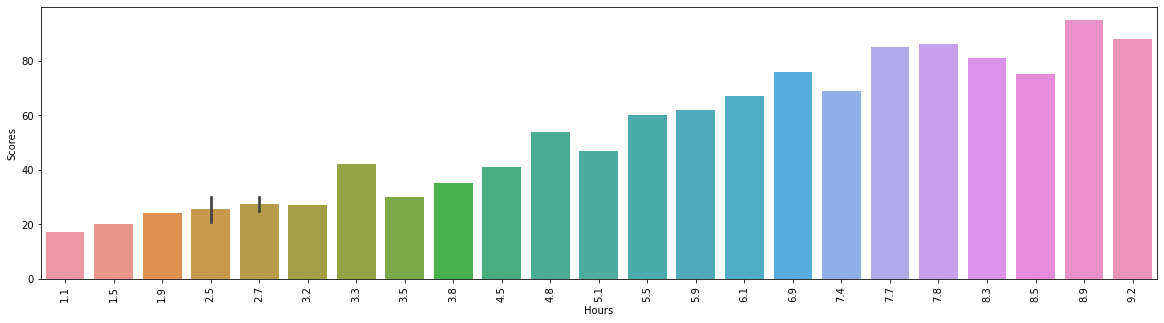

In [15]:
plt.figure(figsize=(20, 5))
plt.xticks(rotation=90)
sns.barplot(x='Hours', y='Scores', data=df);

as you can see the more hours spend in reading the higher the marks

# How Scores are correlated

<AxesSubplot:>

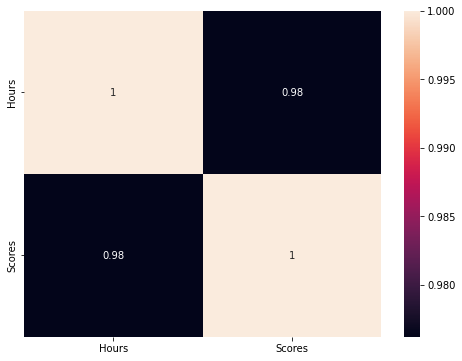

In [16]:
corr=df.corr()
plt.figure(figsize = (8,6))
sns.heatmap(corr,annot=True)

Here the colums are highly correlated which is a good thing although sometimes correlation cannot be trusted 

# Checking for Outliers

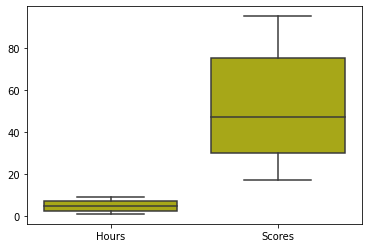

In [17]:
sns.boxplot(data =df,color="y") 
plt.show()

as you can see there are no outliers that mean the data can be trusted to be used

### using scatter Plot for clear visualization

Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

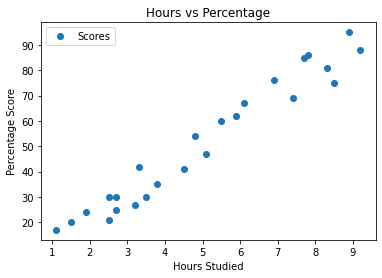

In [21]:
# Plotting the distribution of scores
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

As we found ealier the higher hours studied the higher the scores which is positive linear relation between the number of hours studied and percentage of score

# **Data Modeling**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [22]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [23]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

# Using Linear regression and random forest

# **Linear regression**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [24]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


In [25]:
#linear regression score
regressor.score(X_train, y_train),regressor.score(X_test, y_test)

(0.9515510725211552, 0.9454906892105354)

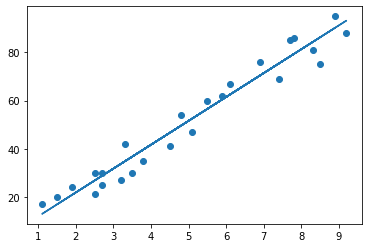

In [26]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

# Random forest

In [27]:
#Creating and fitting RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor(n_estimators = 250, max_features = 'sqrt', n_jobs = 20)
random_forest.fit(X_train, y_train)
print(random_forest.score(X_train, y_train), random_forest.score(X_test, y_test))

0.9905982425646513 0.8008264207438813


As we can see random  forest works more better than linear regression

# **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions using random forest.

### linear regression predictions 

In [28]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


### Random forest predictions 

In [29]:
print(X_test) # Testing data - In Hours
R_pred = random_forest.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


As you can see the results are same

# Comparing Actual vs Predicted for both regressors

In [30]:
# Linear regression
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [31]:
#random forrest
df = pd.DataFrame({'Actual': y_test, 'Predicted': R_pred})  
df 

,Actual,Predicted
0,20,18.725667
1,27,37.486667
2,69,84.432000
3,30,23.508000
4,62,63.648000


From the result we can see that linear regression prediction are more close to acctual which means that random forest is a better regressor in this case

In [32]:
# Making prediction for a given Value with linear regression
hours=9.25
regressor.predict([[hours]])

array([93.69173249])

In [33]:
# Making prediction for a given Value with Random fores
hours = 9.25
random_forest.predict([[hours]])

array([87.98])

# **Model Accuracy Evaluation**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [34]:
from sklearn import metrics  
print('Mean Absolute Error for linear regression:', 
      metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Absolute Error for random forest:', 
      metrics.mean_absolute_error(y_test, R_pred)) 

Mean Absolute Error for linear regression: 4.183859899002982
Mean Absolute Error for random forest: 7.066600000000001


# Conclusion
From the results we can see that random forrest is a better regressor than linear regression in this case so that results which we can trust are for random forest hence we can be able to create a model and use it wenever we want


# Caution
The data used here is very minimal which suggest that we cannot use this model elsewhere since in some cases it migh not occur that way despite of the findings